In [3]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

from tube import Tube, InterpXY, BorderSimple
from gaslayer import GasEOS, GasFluxCalculator, GridStrecher, GasLayer
from math import *
import numpy as np

from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

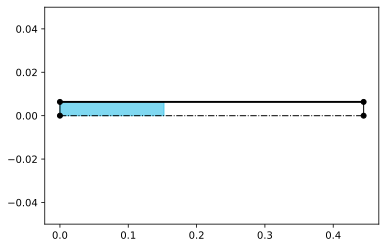

GasLayer(n_cells=300); 
        {'p_max':100000000.0, 'tau_min': 2.729053771499184e-07, 
        'u_max': 0.0, 'cs_max': 1861.4510468986284, 'dx_min': 0.0005079999999999807, 
        'x_1': 0.0, 'x_2': 0.1524,
        'V_1':  0.0, 'V_2':  0.0  }

In [19]:
def get_layer0(l_0, n_cells=300, d = 12.7e-3, p_0 = 1000e5, ld=35):   
    l = d * ld

    gas_layer_dict_sample = {
        'type': 'gas',
        'name': 'H2',
        'gamma': 1.4,
        'kappa': 0,
        'R': 4125,
        'T_0': 600, # K
        'W_0': 0.0003,  # м^3 объем газа
        'p_0': p_0, # начальное давление газа
        'u_0': 0,     #начальная скорость
        'x_2': l_0
    }

    tube_dict = {
        'tube_points': [[0, d], [l, d]]
    }

    calc_settings_sample = {
        'cell_dx': 0.0025,
        'n_cells': n_cells,
        'n_cells_min': 13,
        'n_cells_max': 300,
        'GasFluxCalculator_kwargs': { 'flux_type':2 },
        'GridStrecher_kwargs': {}
    }   
    tube=Tube.get_standart(tube_dict)
    gl = GasLayer.get_standart(tube, 0, gas_layer_dict_sample, calc_settings_sample)   
    return gl

gl = get_layer0(12.7e-3 * 40*0.3)
fig, ax = plt.subplots()
gl.tube.plot(fig, ax)
gl.plot(fig, ax)
ax.set_ylim(-0.05,0.05)
plt.show()

gl

In [20]:
def calc_sol_all(l_0, m, ku=0.5):
    gl = get_layer0(l_0, n_cells=300)
    ku = 0.5
    lrs = [gl]
    for i in range(100000):
        if gl.xs_borders[-1] >= gl.tube.get_xs()[-1]:
            break
        tau = gl.get_tau_min()*ku
        v_left = gl.Vs_borders[-1] + gl.S[-1] * gl.ps[-1] / m * tau
        gl = gl.step_simple(tau, 0, v_left)
        lrs.append(gl)
    return lrs
lrs = calc_sol_all(l_0=0.1, m=0.014, ku=0.5)

In [21]:
@interact(ind=ipywidgets.IntSlider(min=0,max=len(lrs)-1,step=10, value=0))
def plotMe(ind):
    param_name = 'us'
    lr = lrs[ind]
    fig, ax = plt.subplots()
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax.plot(xs, ys, color=color, lw=lw)
    plt.grid(True)
    plt.ylabel(param_name)
#     plt.ylim(-1,1)
    plt.title(f't={lr.time*1000} ms; i={ind}')
    plt.show()

interactive(children=(IntSlider(value=0, description='ind', max=7022, step=10), Output()), _dom_classes=('widg…

In [22]:
l0s = np.linspace(0.05,0.3, 100)
Vs = []
for lo in tqdm_notebook(l0s):
    lrs = calc_sol_all(l_0=lo, m=0.014, ku=0.5)
    Vs.append(lrs[-1].Vs_borders[-1])

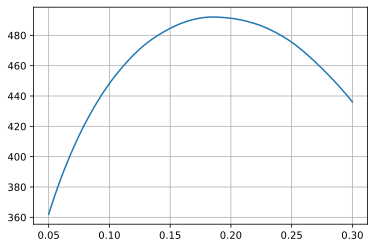

In [23]:
plt.plot(l0s, Vs)
plt.grid()
plt.show()

In [24]:
for i in range(len(Vs)):
    if Vs[i] > 450:
        break
l0s[i]

0.10303030303030303